In [1]:
# import library 
import pandas as pd

In [2]:
# Load data
mcdonalds = pd.read_csv("mcdonalds.csv")

In [3]:
print(mcdonalds)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
0         No         No   

In [4]:
# Get dimensions of the dataset
dimensions = mcdonalds.shape

print(dimensions)

(1453, 15)


In [5]:
# Print the ist five value of dataset
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
# Data Preprocessing 
# Convert yes to 1 and no to 0 to replace categorical values
mcdonalds1=mcdonalds.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(mcdonalds1.mean(),2)
print(mean)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
from sklearn.decomposition import PCA
import numpy as np
# perform PCA
pca = PCA()

# Fit and transform the data
MD_pca = pca.fit_transform(mcdonalds1)

# Fit PCA separately (if needed for further use)
MD_p = pca.fit(mcdonalds1)

# Calculate standard deviation of principal components
SD = np.sqrt(pca.explained_variance_)

# Calculate proportion of variance explained by each principal component
PV = pca.explained_variance_ratio_

# Create index for principal components
index = ["PC{}".format(i) for i in range(1, len(SD) + 1)]

# Create summary DataFrame
summary = pd.DataFrame({
    "Standard deviation": SD,
    "Proportion of Variance": PV,
    "Cumulative Proportion": PV.cumsum()
}, index=index)
# Print summary
print(summary)

      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


In [8]:
import numpy as np
# Print standard deviations
print("Standard deviations (1, .., p=11):")
print(np.round(SD, 1))


Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [9]:
# This code computes the standard deviation of principal components, generates a rotation matrix for them, and creates a DataFrame to visualize the rotated principal components.
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=mcdonalds1.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df


Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


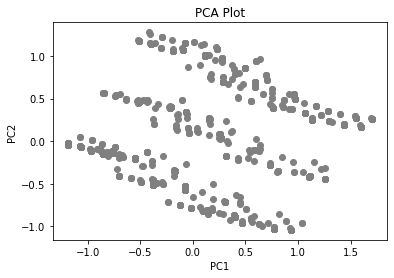

Projection Axes (PC1, PC2):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 

In [10]:
import matplotlib.pyplot as plt
# Plot the PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

# Print the projection axes
projection_axes = pca.components_
print("Projection Axes (PC1, PC2):")
print(projection_axes)

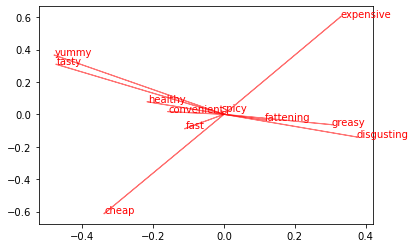

In [11]:
# Add projection arrows
for i in range(len(pca.components_[0])):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.5)
    plt.text(pca.components_[0, i], pca.components_[1, i], mcdonalds1.columns[i], color='red')

# Show plot
plt.show()

Projection Axes (PC1, PC2):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 

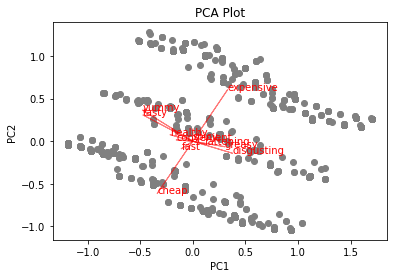

In [12]:
# This code performs PCA on the dataset new_data, transforms the data into a lower-dimensional space, and visualizes it
# using a scatter plot with labeled axes.
# Plot the PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')

# Print the projection axes
projection_axes = pca.components_
print("Projection Axes (PC1, PC2):")
print(projection_axes)

# Add projection arrows
for i in range(len(pca.components_[0])):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.5)
    plt.text(pca.components_[0, i], pca.components_[1, i], mcdonalds1.columns[i], color='red')

# Show plot
plt.show()

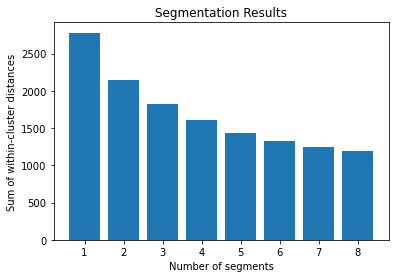

In [13]:
from sklearn.cluster import KMeans
# Set random seed
np.random.seed(1234)

# Number of repetitions
nrep = 10

# Range of number of segments
num_segments = range(1, 9)

# Initialize list to store within-cluster distances
within_cluster_distances = []

# Dictionary to store KMeans models
MD_km28 = {}

# Loop over each number of segments
for k in num_segments:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    
    # Fit model to data
    kmeans.fit(mcdonalds1)
    
    # Append within-cluster distance to list
    within_cluster_distances.append(kmeans.inertia_)
    
    # Store KMeans model in dictionary
    MD_km28[str(k)] = kmeans

# Plot within-cluster distances
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


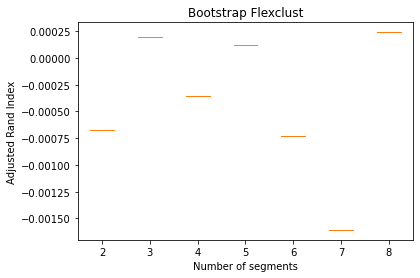

In [14]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample  

# Set random seed
np.random.seed(1234)

# Number of bootstrap samples
nboot = 100

# Number of repetitions
nrep = 10

# Bootstrap resampling for each number of segments
bootstrap_samples = [resample(mcdonalds1.values, random_state=1234) for _ in range(nboot)]

# List to store adjusted Rand index
adjusted_rand_index = []

# Range of number of segments
num_segments = range(2, 9)

for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        # Initialize KMeans model
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        
        # Fit KMeans model to bootstrap sample
        kmeans.fit(bootstrap_sample)
        
        # Predict cluster labels for bootstrap sample
        cluster_labels = kmeans.predict(bootstrap_sample)
        
        # Predict cluster labels for original data
        true_labels = kmeans.predict(mcdonalds1.values)
        
        # Calculate adjusted Rand index
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        
        stability_scores.append(stability_score)
    
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

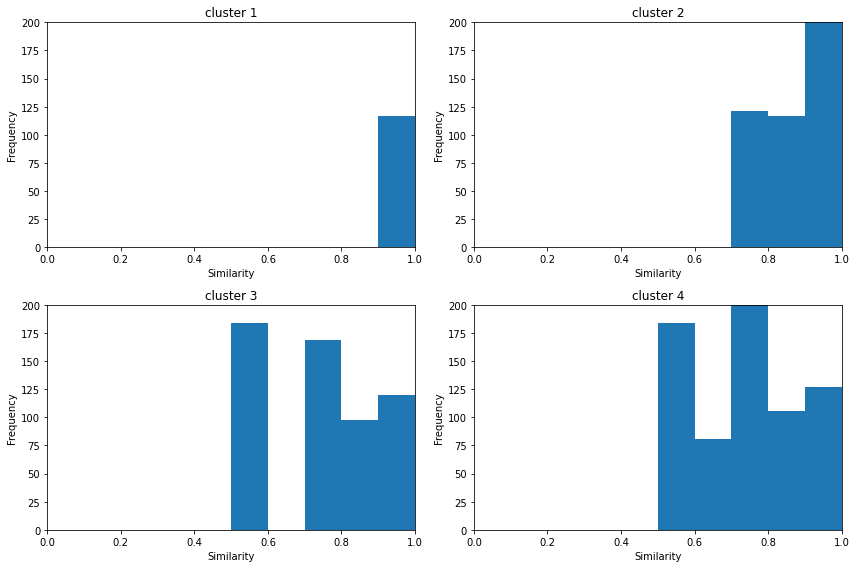

In [15]:
# Importing necessary library
import matplotlib.pyplot as plt

# Define the range of values, number of bins, and maximum frequency
range_values = (0, 1)
num_bins = 10
max_frequency = 200

# Creating a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Looping through each cluster
for i in range(1, 5):
    # Assuming MD_km28 is a dictionary and mcdonalds1 is some data
    labels = MD_km28[str(i)].predict(mcdonalds1)
    similarities = MD_km28[str(i)].transform(mcdonalds1).min(axis=1)
    # Calculating the row and column index for the subplot
    row = (i - 1) // 2
    col = (i - 1) % 2

    # Plotting the histogram on the respective subplot
    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    
    # Setting labels and title for the subplot
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    # Setting the x and y limits for the subplot
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    # Setting specific tick marks on the x-axis
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()


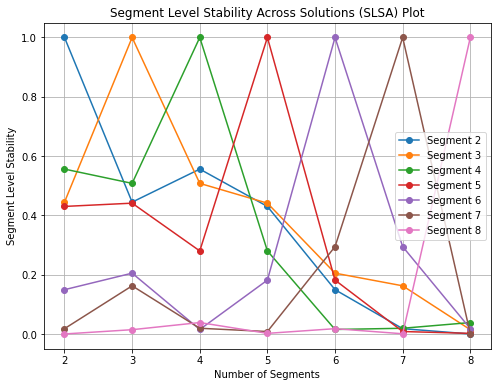

In [16]:
# Define the range of segments
num_segments = range(2, 9)

# Initialize a list to store stability scores for each segment
segment_stability = []

# Compute stability scores for each segment
for segment in num_segments:
    # Initialize a list to store stability scores for current segment
    stability_scores = []
    for num in num_segments:
        # Predict cluster labels for both segment and num
        labels_segment = MD_km28[str(segment)].predict(mcdonalds1)
        labels_num = MD_km28[str(num)].predict(mcdonalds1)
        # Compute and append stability score for current num
        stability_score = np.mean(labels_segment == labels_num)
        stability_scores.append(stability_score)
    # Append stability scores for current segment to the list
    segment_stability.append(stability_scores)

# Plot the SLSA plot
plt.figure(figsize=(8, 6))
for idx, segment in enumerate(num_segments):
    plt.plot(num_segments, segment_stability[idx], marker='o', label=f'Segment {segment}')

# Set plot labels and title
plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')

# Set x-axis ticks
plt.xticks(num_segments)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


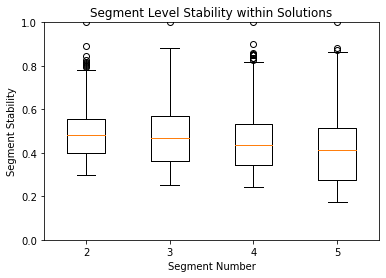

In [17]:
# Define segment solutions
segment_solutions = ["2", "3", "4", "5"]

# Initialize dictionaries to store segment labels and similarities
segment_labels = {}
segment_similarities = {}

# Compute segment labels and similarities for each segment solution
for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(mcdonalds1)
    segment_similarities[segment] = MD_km28[segment].transform(mcdonalds1).min(axis=1)

# Normalize similarities and store them in a list
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

# Plot boxplot of segment stability values
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

# Show the plot
plt.show()


In [18]:
from scipy.stats import entropy
from sklearn.cluster import KMeans

np.random.seed(1234)

# Initialize list to store results
MD_m28 = []

# Range of k values
k_values = range(2, 9)

# Iterate over each k value
for k in k_values:
    # Fit KMeans model
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(mcdonalds1.values)
    
    # Calculate metrics
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = mcdonalds1.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    
    # Calculate class probabilities and entropy
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    
    # Calculate ICL
    icl = bic - class_entropy
    
    # Append results to list
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Create DataFrame
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the DataFrame
print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1    18       True  3   3 -1819.760124  3645.520247  3661.364404  3660.283376
2    13       True  4   4 -1603.020916  3214.041831  3235.167374  3233.822143
3    10       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.896202  2675.792404  2707.480718  2705.715191
5    10       True  7   7 -1247.102133  2508.204266  2545.173966  2543.249651
6    11       True  8   8 -1186.873546  2389.747091  2431.998177  2429.996533


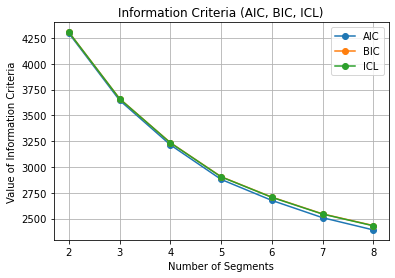

In [19]:
# This code creates a plot to compare the performance of different models based on AIC, BIC, and ICL values as the number of segments changes.

num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [20]:
from sklearn.mixture import GaussianMixture


# Define the number of clusters
k = 4

# Fit KMeans model
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans_clusters = kmeans.fit_predict(mcdonalds1)

# Fit Gaussian Mixture model
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm_clusters = gmm.fit_predict(mcdonalds1)

# Store results in a DataFrame
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Filter data based on GMM cluster 3
MD_m4 = mcdonalds1[results['mixture'] == 3]

# Fit KMeans model on filtered data
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4_clusters = k4_m4.fit_predict(MD_m4)

# Store results in a DataFrame
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Print crosstabs
print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0          0  340    0  186
1          0   49  259   65
2        199    1   35    4
3        256    2    0   57
kmeans   0   1   2   3
kmeans                
0       55  20  20  14
1       47  17  14   5
2       26  15   6   3
3       42  11  10   7


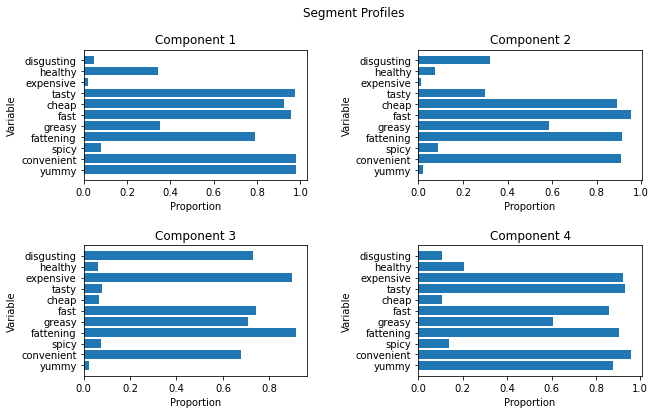

In [21]:
# This code plots horizontal bar charts for each segment, showing the average values of variables within the segments identified by a KMeans clustering model.

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = mcdonalds1.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
for i, ax in enumerate(axs.flat):
    ax.barh(range(MD_mean.shape[1]), MD_mean.iloc[i])
    ax.set_title(f'Component {i+1}')
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(mcdonalds1.columns)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('Segment Profiles')
plt.show()


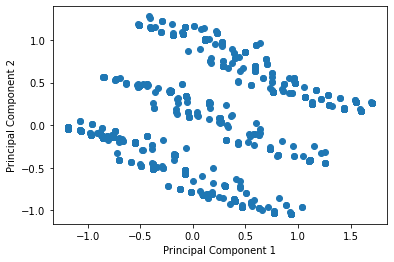

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(mcdonalds1)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(mcdonalds1)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()


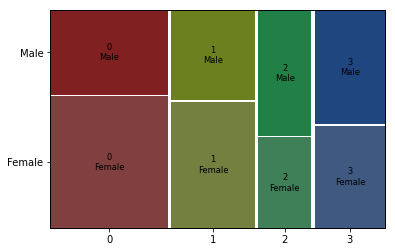

In [23]:
# This code creates a mosaic plot to visualize the relationship between clusters identified by KMeans and the gender distribution within each cluster.
from statsmodels.graphics.mosaicplot import mosaic


MD_k4 = MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, mcdonalds['Gender'])

mosaic(ct.stack(), gap=0.01)

plt.show()
